# <center>Word Embedding</center>

In Natural Language Processing, Word Embedding refers to the procces of representing each word in the form of a real valued vector. These vectors have an interesting property, they encode the meaning of the words. This means the words that have closer meanings will produce closer vectors and vice versa.
<br>
There are two major pretrained modules for embedding words, namely <b>Word2Vec</b> and <b>GloVe</b>. In this notebook we will explore both of them.

## Word2Vec

Word2Vec is one of the most popular implementations of word embedding. The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text. There are two ways of training a Word2Vec model. <a href=https://arxiv.org/abs/1301.3781>Click to see paper.</a>
<ol>
    <li>Continuous Bag-of-Words (CBow)</li>
    <li>Skip-gram</li>
</ol>
In the CBoW model, the distributed representations of context (or surrounding words) are combined to predict the word in the middle. While in the Skip-gram model, the distributed representation of the input word is used to predict the context.

## Exploring Word2Vec Model


<h4>1.</h4>
Word2Vec model can be downloaded by using the <i>gensim</i> library as below.  <a href=https://pypi.org/project/gensim/>Installation Guide</a>

In [1]:
import numpy as np
from gensim import downloader

In [2]:
word2vec = downloader.load("word2vec-google-news-300")

<h4>2.</h4>

Now we can use the downloaded model to get the embedding of different word. For each word in vocabulary, the model returns a 300-dimentional vector.

In [3]:
word2vec['plane']

array([ 0.24804688, -0.23339844, -0.15234375, -0.15039062, -0.03515625,
       -0.39257812, -0.25585938, -0.32226562,  0.41601562, -0.14746094,
        0.31835938, -0.43164062,  0.10009766, -0.16992188, -0.07373047,
        0.484375  , -0.04101562,  0.14160156,  0.08105469, -0.08349609,
        0.03857422,  0.03295898,  0.06591797, -0.2265625 ,  0.13085938,
       -0.15820312, -0.20703125,  0.15917969,  0.22558594, -0.15136719,
       -0.30859375, -0.16503906, -0.30078125, -0.24511719, -0.12695312,
       -0.16699219, -0.20410156,  0.2109375 , -0.10546875,  0.31054688,
        0.14453125,  0.02954102,  0.27539062, -0.08984375,  0.11474609,
       -0.31835938,  0.07763672, -0.03051758,  0.34960938, -0.00552368,
       -0.109375  ,  0.16894531,  0.40820312, -0.1484375 , -0.15234375,
       -0.2265625 , -0.01367188,  0.07324219,  0.203125  ,  0.00448608,
        0.375     , -0.18066406, -0.11572266,  0.20703125,  0.13378906,
        0.01013184,  0.06347656,  0.05273438,  0.02893066,  0.07

<h4>3.</h4>

Using this model, we can even get the most similar words to a particular word.

In [4]:
word2vec.most_similar("apple")

[('apples', 0.720359742641449),
 ('pear', 0.6450697183609009),
 ('fruit', 0.6410146355628967),
 ('berry', 0.6302294731140137),
 ('pears', 0.6133960485458374),
 ('strawberry', 0.6058261394500732),
 ('peach', 0.6025872826576233),
 ('potato', 0.5960935354232788),
 ('grape', 0.5935865044593811),
 ('blueberry', 0.5866668224334717)]

<h4>4.</h4>

Or even we can do more exciting things, such as checking the famous equation <br>
<center> $queen - girl + boy = king$ </center>

In [5]:
word2vec.most_similar(positive=['queen', 'boy'], negative=['girl'], topn=1)

[('king', 0.7298423051834106)]

<h4>5.</h4>

Now its time to do something even more exciting. <i> TSNE </i> is a statistical method for reducing the dimention of high dimentional vectors, to 2 or 3. With this method we will be able to actuallt plot the embedded words in a 2D or 3D plot. Lets plot some points!
<br>
<br>
Here we have a small dictionary of words. This dictionary contains words that are either <b>School</b>, <b>Clothing</b> or <b>Fruit</b> related. First, we embedd each word using Word2Vec model, then we project them in 2D space using TSNE. Then we plot them. 
<br>
<br>
It can be seen from the plot that words which have closer meaning, are closer in the vector space. Words can be clustered in a way that each cluster represent one group of words. This exciting result indicated that the Word2Vec model aligns with our expectations of a word embedding model.

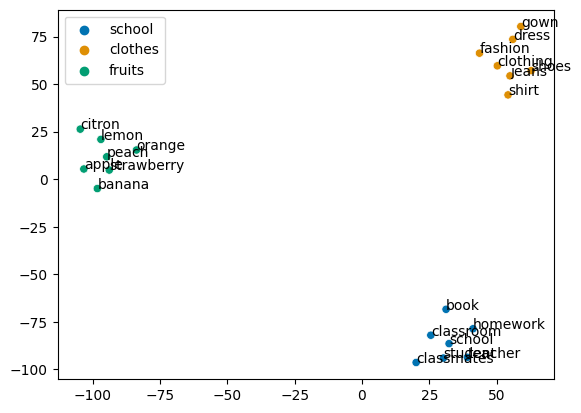

In [6]:
from sklearn.manifold import TSNE
import seaborn as sns

# Words
words = ['school', 'student', 'teacher', 'homework', 'book', 'classroom', 'classmates',\
         'fashion', 'clothing', 'jeans', 'dress', 'shoes', 'gown', 'shirt',\
         'banana' ,'orange', 'citron', 'strawberry', 'apple', 'lemon', 'peach']

# Label of words (Groups)
clusters = ['school'] * 7 + ['clothes'] * 7 + ['fruits'] * 7

# Embedding words
word_vectors = np.array([word2vec[word] for word in words])

# Projecting vectors in 2D space
TSNE_model = TSNE(init='random', learning_rate='auto', perplexity = 3, random_state=4)
embedded_vectors = TSNE_model.fit_transform(word_vectors)
x, y = embedded_vectors[:,0], embedded_vectors[:,1]

# Plotting
ax = sns.scatterplot(x=x, y=y, hue=clusters, palette='colorblind')
for index, word in enumerate(words):
    ax.annotate(word, xy=(x[index], y[index]))

## GloVe
GloVe is another model for word embedding. This model uses the global properties of words in a corpus. <a href=https://nlp.stanford.edu/pubs/glove.pdf>See Paper.</a>
<br>
For this model, training is performed on aggregated global word t word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

## Exploring Word2Vec Model


<h4>1.</h4>
GloVe model can be downloaded by using the <i>gensim</i> library as below. The corpus for this model is <a href=https://en.wikipedia.org/>wikipedia.</a>

In [7]:
GloVe = downloader.load('glove-wiki-gigaword-300')

<h4>2.</h4>

Now that we downloaded the GloVe model, we pretty much can do everything we did on Word2Vec model. So we get the vector representation of a word. 

In [8]:
GloVe['ocean']

array([ 1.2654e-01, -6.4278e-01, -4.5298e-01, -1.4820e-02, -1.4442e-01,
        1.6746e-01, -8.5392e-02, -2.0653e-01,  5.8867e-01, -1.4552e+00,
        5.0849e-01,  1.1859e-01,  9.4727e-02, -3.5716e-01,  2.3545e-03,
        2.4716e-01, -9.9644e-02,  1.8471e-01, -2.7065e-01,  9.1557e-01,
       -5.3791e-01,  4.9689e-01, -3.9529e-01,  9.1110e-02, -3.2922e-01,
        6.7927e-02,  3.6384e-01,  6.8760e-01, -4.6816e-01, -4.1416e-01,
        7.1162e-01,  3.4765e-01, -8.1837e-01, -6.7352e-01,  4.4033e-01,
       -5.3426e-02,  2.7713e-01,  2.2645e-02, -3.6503e-02,  4.5222e-01,
       -5.3126e-01,  7.6748e-02,  2.1450e-01,  1.5700e-01,  6.1417e-02,
        3.0464e-01,  8.0843e-01,  1.3985e-01,  3.8982e-01, -1.8201e-01,
       -3.2407e-02,  1.0731e-01,  5.6028e-01, -6.6759e-01,  1.8634e-02,
        4.2655e-01,  2.5388e-01,  1.5547e-01,  1.1796e-02,  2.8300e-01,
       -2.6325e-01,  3.6569e-01,  9.5695e-01, -8.9697e-02,  4.3428e-01,
       -2.6370e-01, -5.2575e-01,  3.7261e-01, -7.9395e-01,  2.44

<h4>3.</h4>

Getting the similar words to a particular word.

In [9]:
GloVe.most_similar("moon")

[('mars', 0.6063024997711182),
 ('lunar', 0.5746049880981445),
 ('earth', 0.5696071982383728),
 ('ki', 0.5655298233032227),
 ('spacecraft', 0.5030633211135864),
 ('planet', 0.4963635206222534),
 ('orbit', 0.4882160723209381),
 ('sun', 0.48067277669906616),
 ('jupiter', 0.48065876960754395),
 ('saturn', 0.4672008156776428)]

<h4>4.</h4>

Checking the equation <br>
<center> $queen - girl + boy = king$ </center>

In [12]:
GloVe.most_similar(positive=['queen', 'boy'], negative=['girl'], topn=1)

[('king', 0.6770139932632446)]

<h4>5.</h4>

The most exciting part, visualizing low dimention vectors.

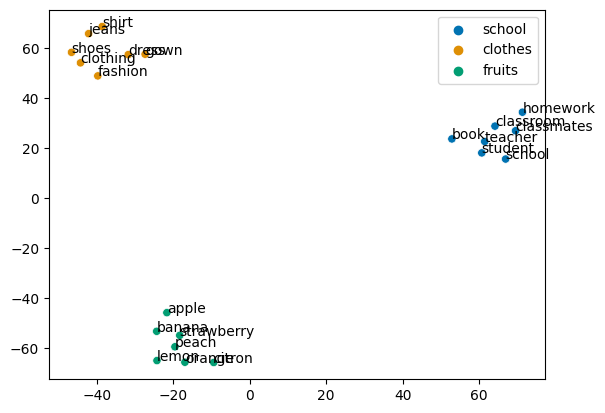

In [11]:
from sklearn.manifold import TSNE
import seaborn as sns

# Words
words = ['school', 'student', 'teacher', 'homework', 'book', 'classroom', 'classmates',\
         'fashion', 'clothing', 'jeans', 'dress', 'shoes', 'gown', 'shirt',\
         'banana' ,'orange', 'citron', 'strawberry', 'apple', 'lemon', 'peach']

# Label of words (Groups)
clusters = ['school'] * 7 + ['clothes'] * 7 + ['fruits'] * 7

# Embedding words
word_vectors = np.array([GloVe[word] for word in words])

# Projecting vectors in 2D space
TSNE_model = TSNE(init='random', learning_rate='auto', perplexity = 3, random_state=4)
embedded_vectors = TSNE_model.fit_transform(word_vectors)
x, y = embedded_vectors[:,0], embedded_vectors[:,1]

# Plotting
ax = sns.scatterplot(x=x, y=y, hue=clusters, palette='colorblind')
for index, word in enumerate(words):
    ax.annotate(word, xy=(x[index], y[index]))